In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
AA="C:/Users/ganes/OneDrive/Desktop/AI/Drug/DDH_Final.xlsx"
df_S=pd.read_excel(AA)
df_S.head(5)
df_S=pd.read_excel(AA)
df_S.head(5)
df_S.shape



(1820, 1026)

In [3]:
X_OS = df_S.iloc[:, 0:1024]
Y_OS= df_S.iloc[:,1025]

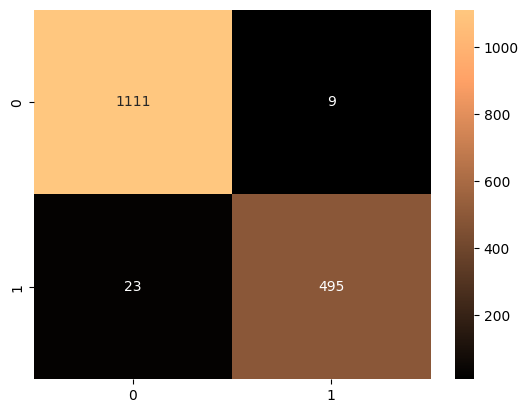

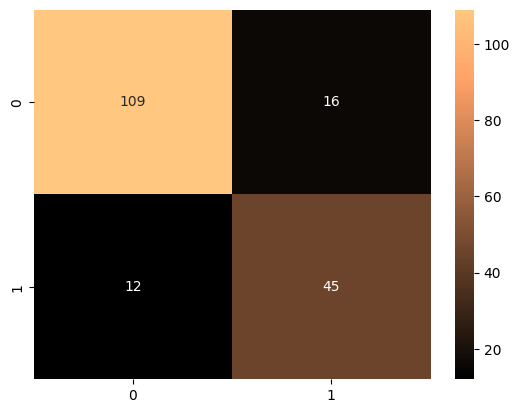

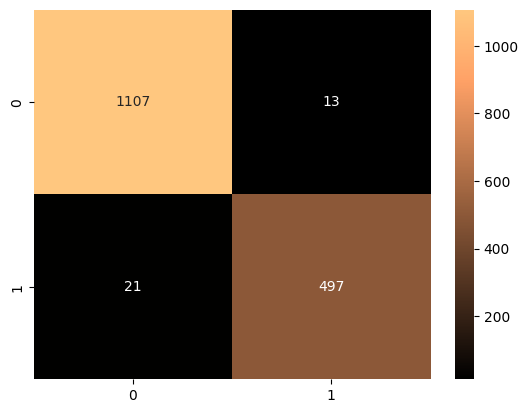

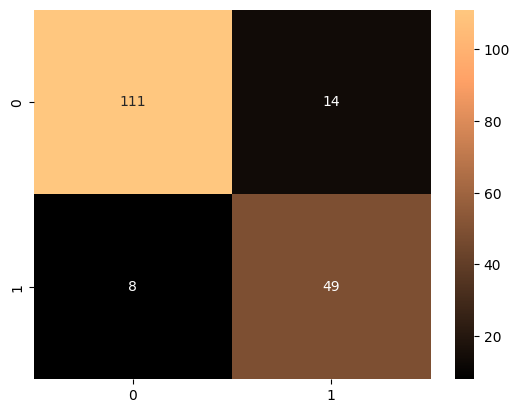

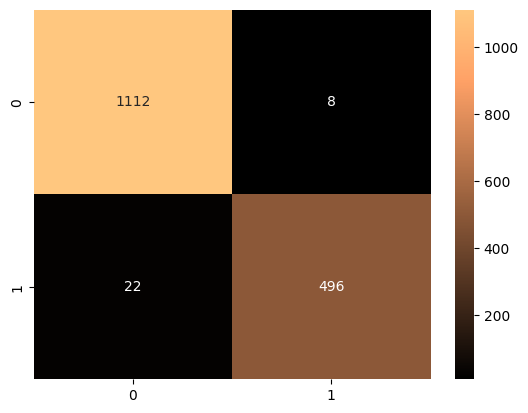

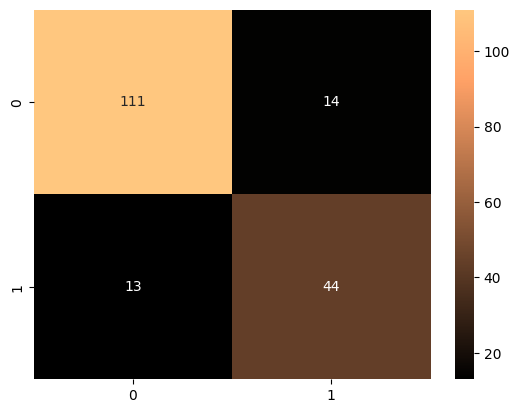

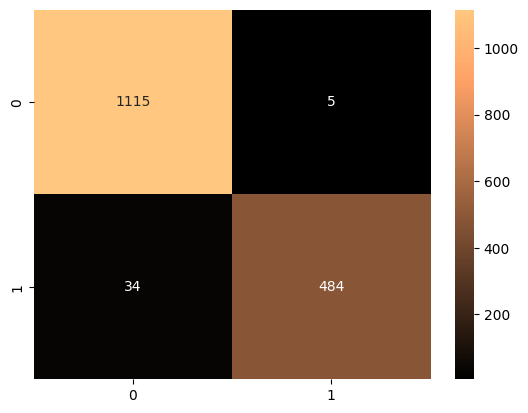

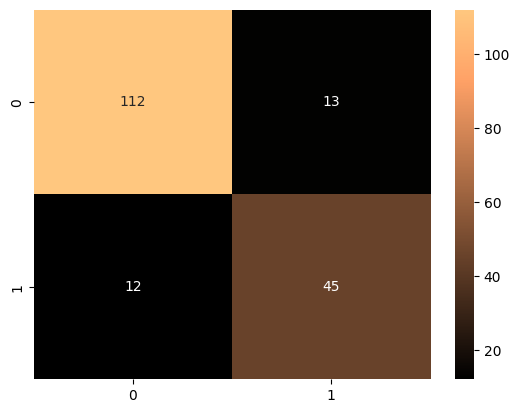

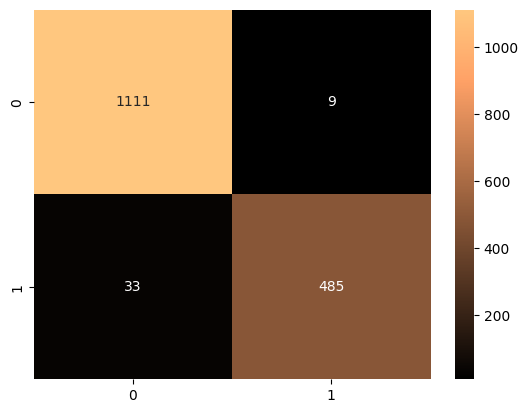

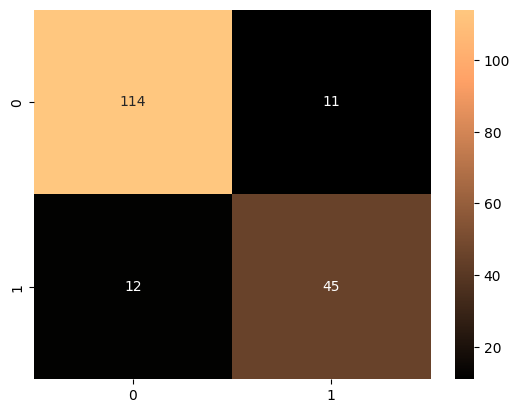

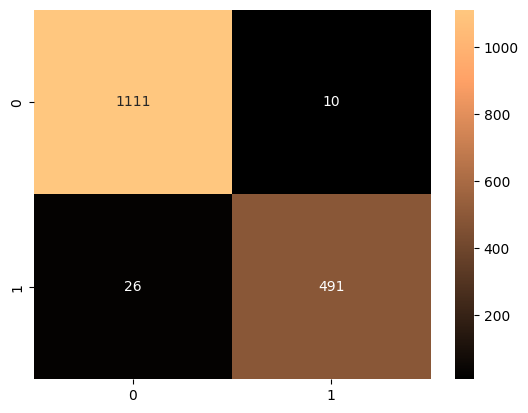

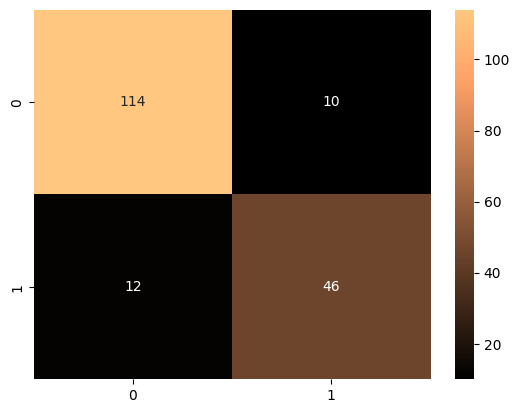

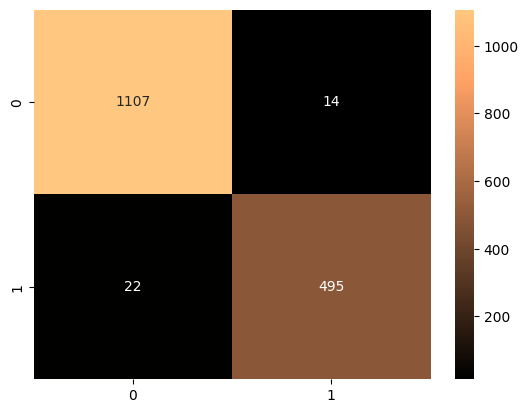

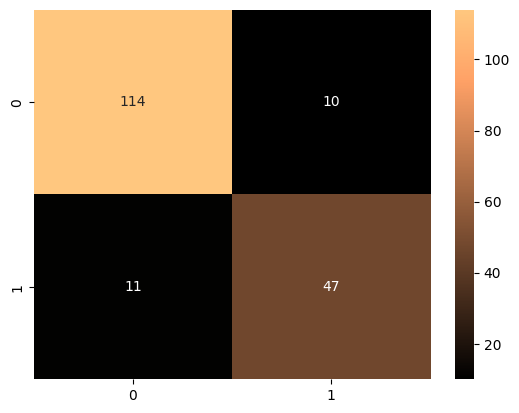

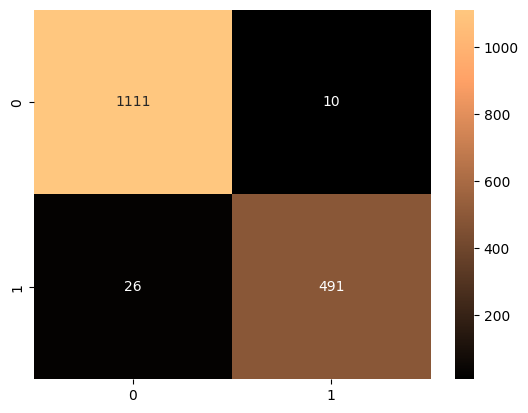

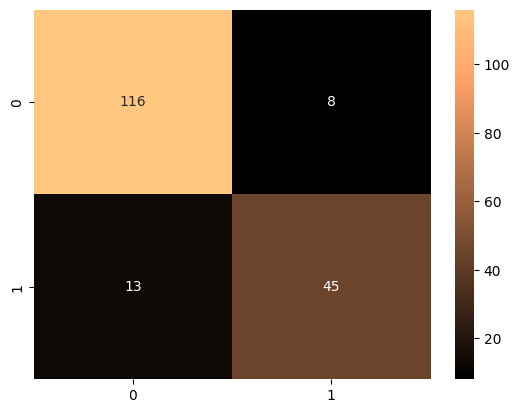

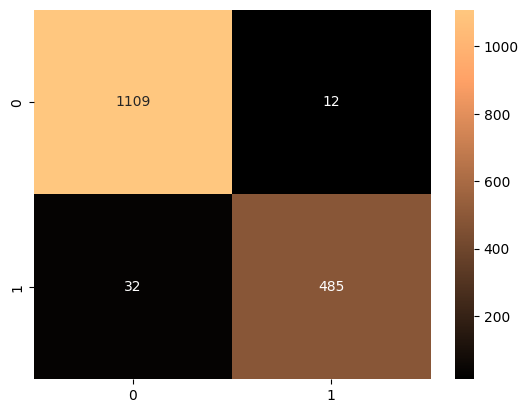

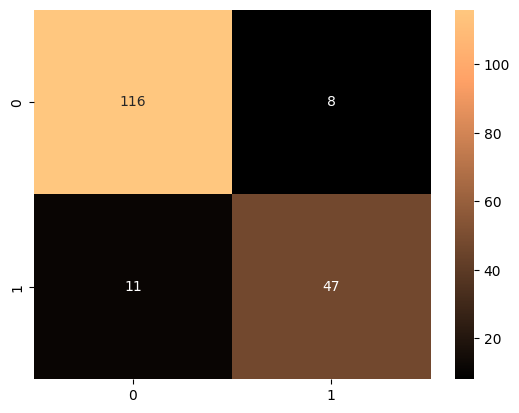

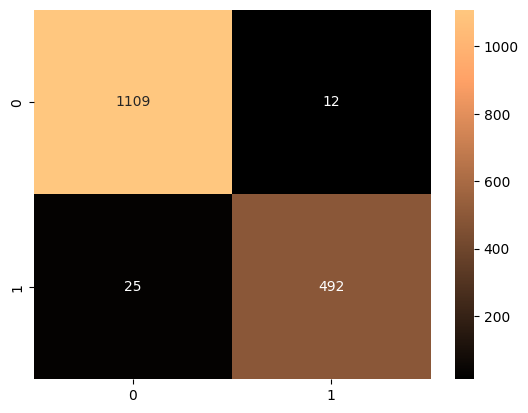

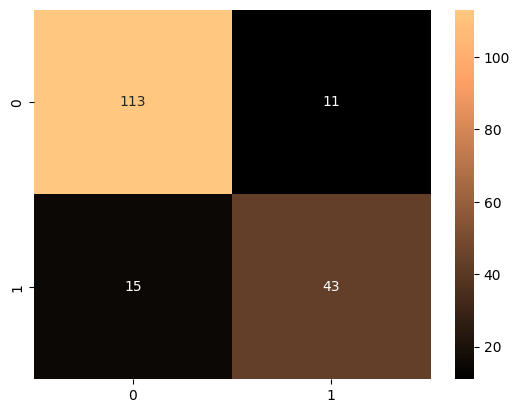

train accuracy 0.9776556776556775
test accuracy 0.8714285714285716
train precision 0.978245392793281
test precision 0.852417940367563
train recall 0.9699416548855453
test recall 0.8504001112347052
train f1 0.9739233328669481
test f1 0.8509966503770461
train               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1121
           1       0.98      0.95      0.96       517

    accuracy                           0.98      1638
   macro avg       0.98      0.97      0.97      1638
weighted avg       0.98      0.98      0.98      1638

test               precision    recall  f1-score   support

           0       0.88      0.91      0.90       124
           1       0.80      0.74      0.77        58

    accuracy                           0.86       182
   macro avg       0.84      0.83      0.83       182
weighted avg       0.86      0.86      0.86       182

Matthews correlation coefficient 0.9481448322249684
Matthews correlation coefficien

In [4]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RFTrain=list()
mmc_RFTest=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1, )
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    mmc_Train= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_RFTrain.append(mmc_Train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_RFTest)
    mmc_RFTest.append(mmc_test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
    plt.show()
    sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
    plt.show()   
 
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient',mean(mmc_RFTrain))
print('Matthews correlation coefficient',mean(mmc_RFTest))


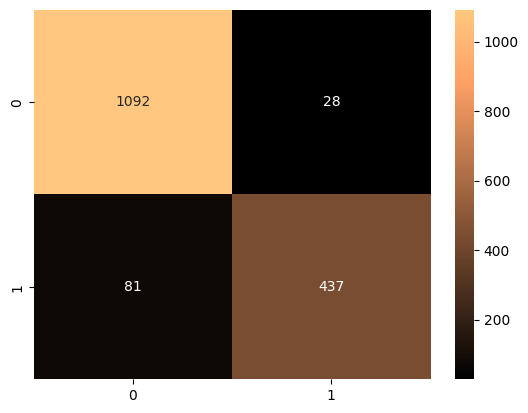

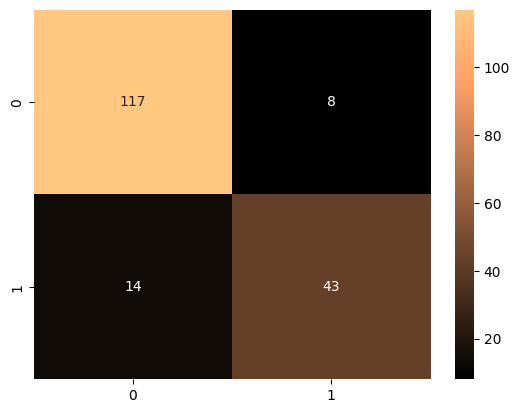

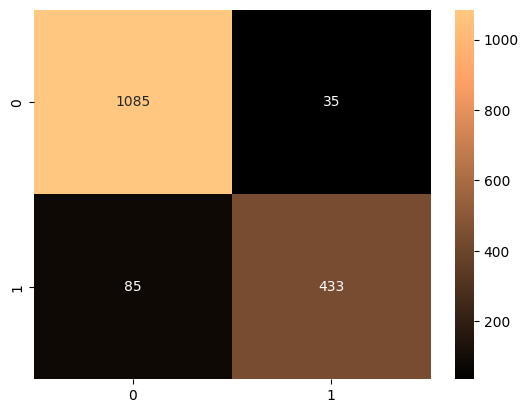

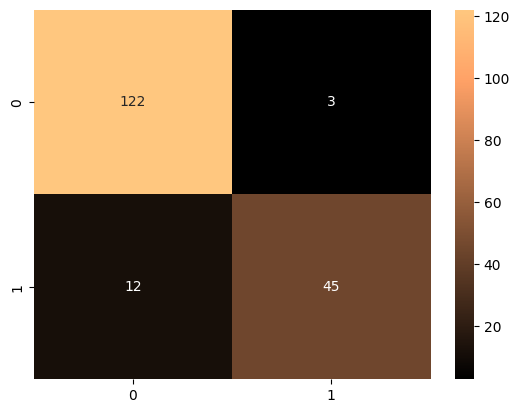

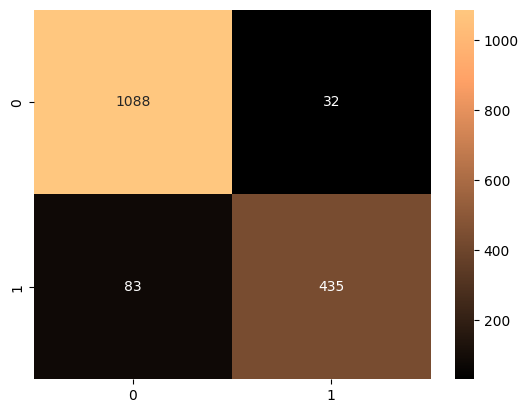

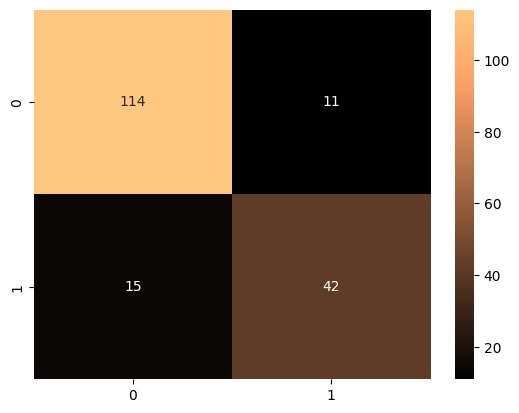

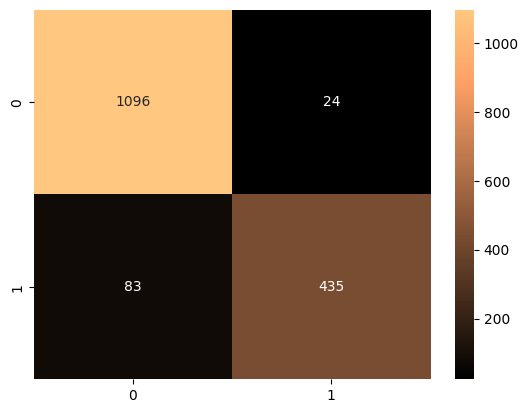

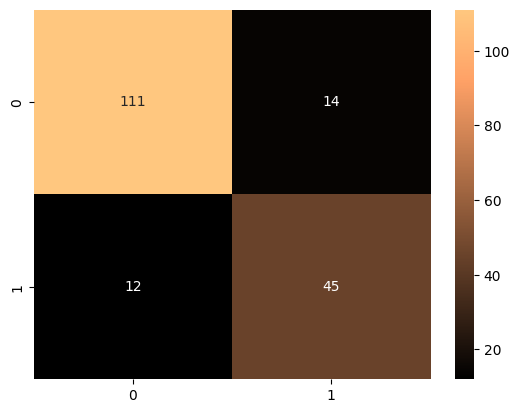

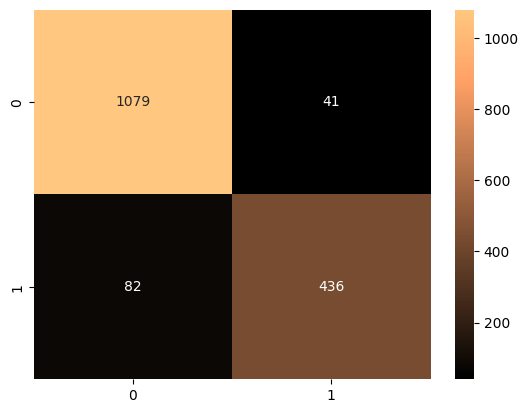

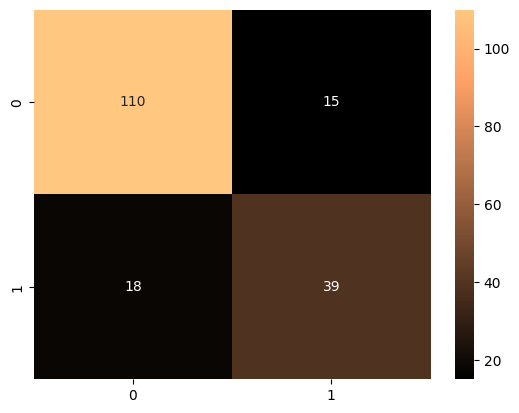

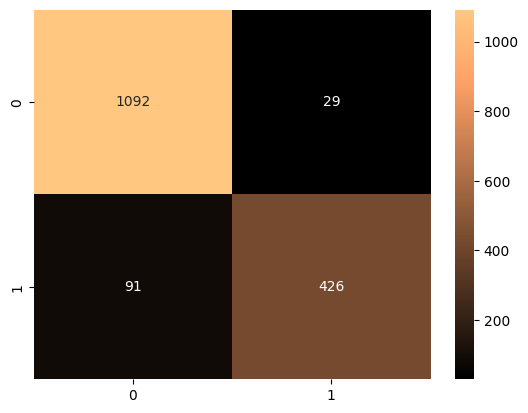

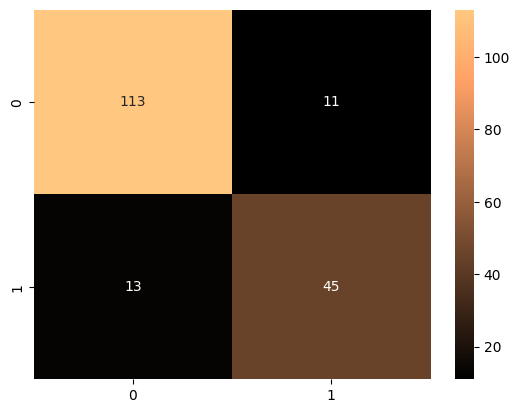

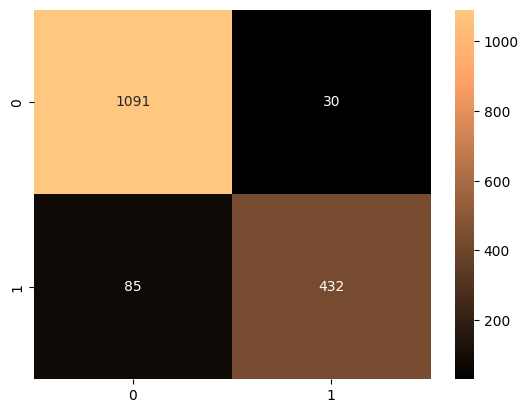

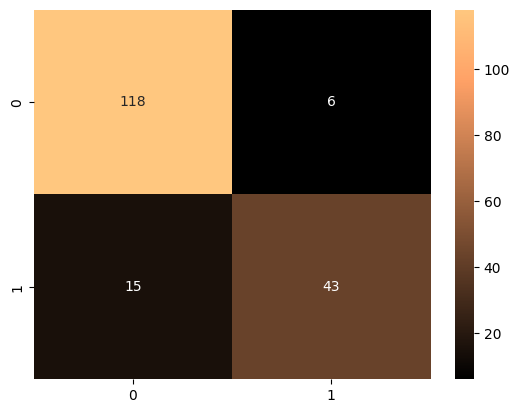

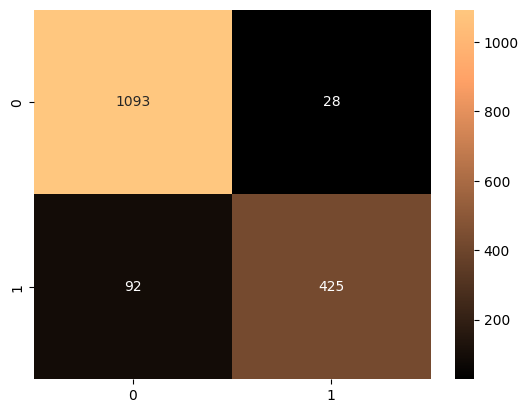

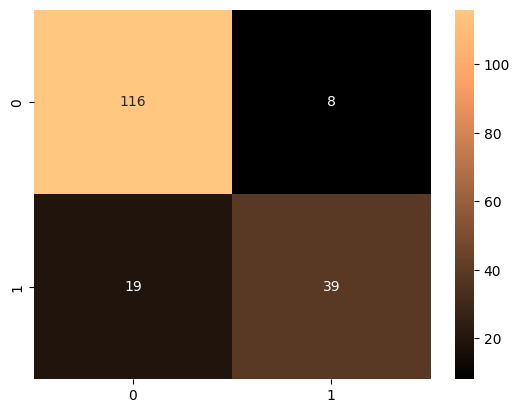

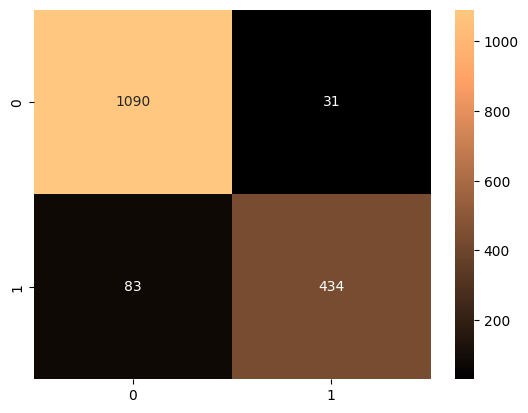

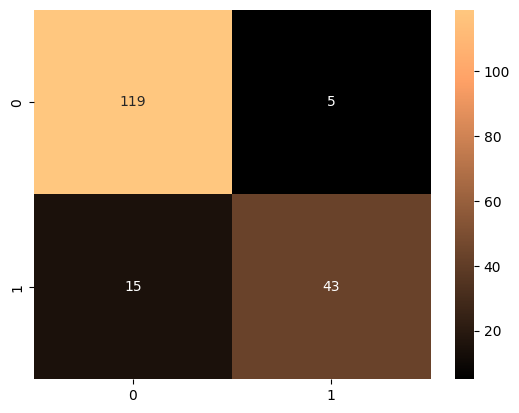

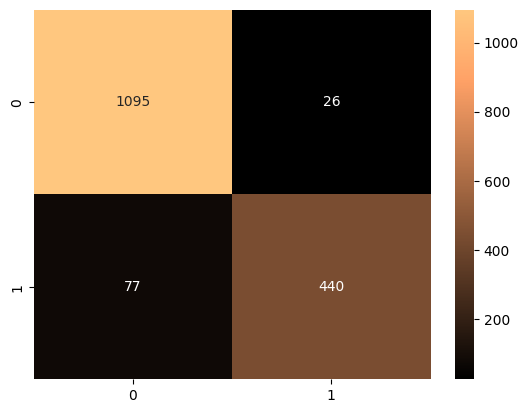

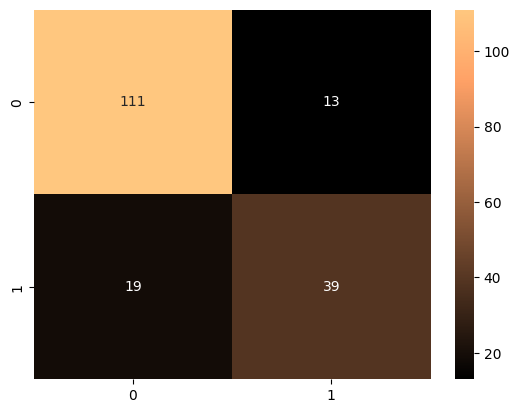

train accuracy 0.9300366300366301
test accuracy 0.864835164835165
train precision 0.9314192368724872
test precision 0.8524544115710224
train recall 0.9050802662395656
test recall 0.8301530023612982
train f1 0.9166308082601912
test f1 0.8392585022066671
train               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1121
           1       0.94      0.85      0.90       517

    accuracy                           0.94      1638
   macro avg       0.94      0.91      0.93      1638
weighted avg       0.94      0.94      0.94      1638

test               precision    recall  f1-score   support

           0       0.85      0.90      0.87       124
           1       0.75      0.67      0.71        58

    accuracy                           0.82       182
   macro avg       0.80      0.78      0.79       182
weighted avg       0.82      0.82      0.82       182

Matthews correlation coefficient 0.8360776373574785
Matthews correlation coefficie

In [5]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_GBTrain=list()
mmc_GBTest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1,)
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    mmc_Train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_GBTrain.append(mmc_Train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_GBTest.append(mmc_test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    conf_matrix_Test.append(conf_matrix2)
    sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
    plt.show()
    sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
    plt.show()   
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest)) 
print('Matthews correlation coefficient',mean(mmc_GBTrain))
print('Matthews correlation coefficient',mean(mmc_GBTest))

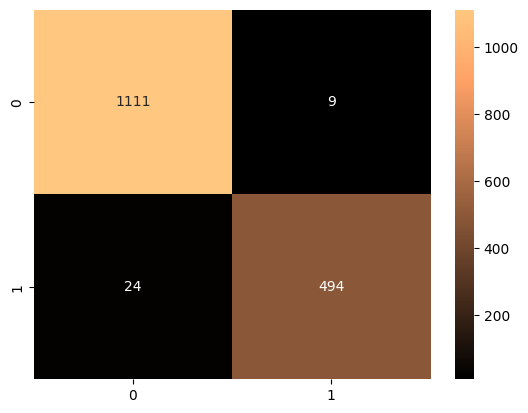

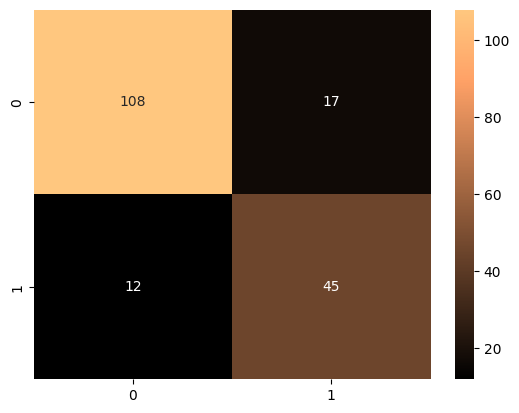

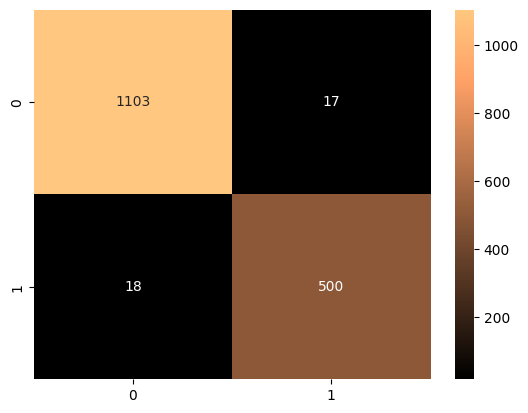

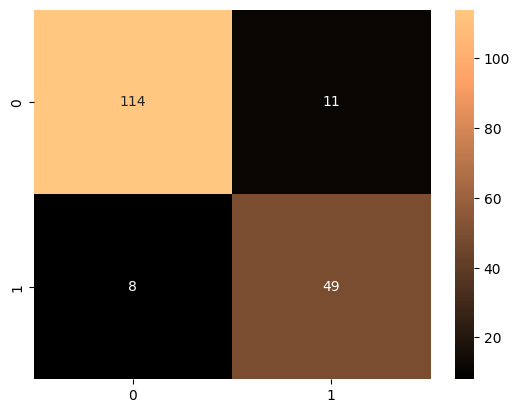

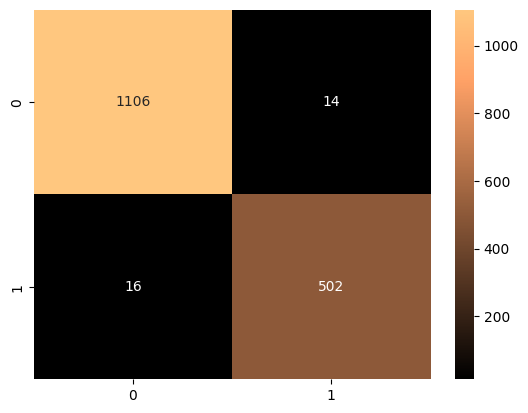

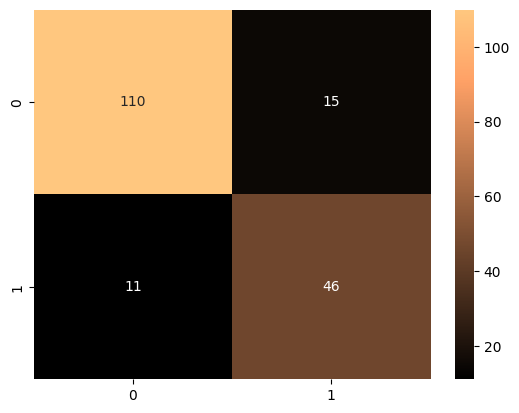

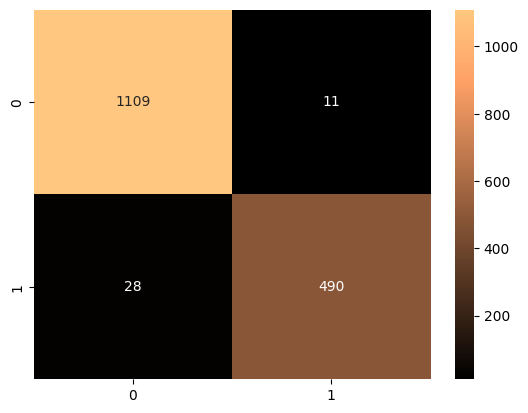

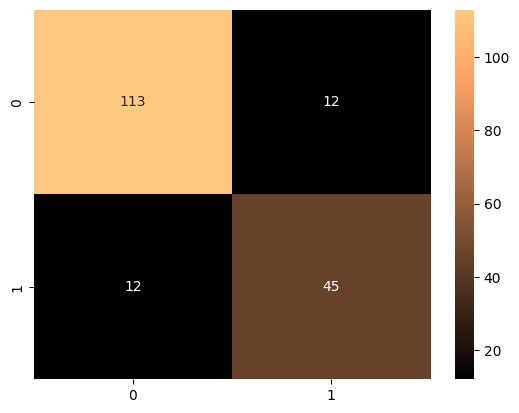

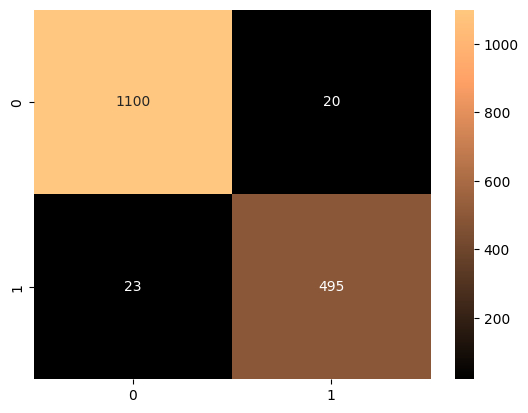

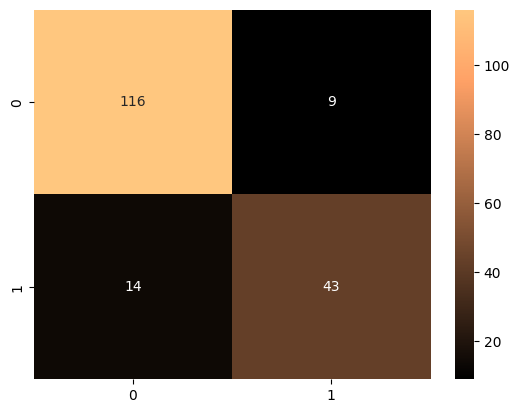

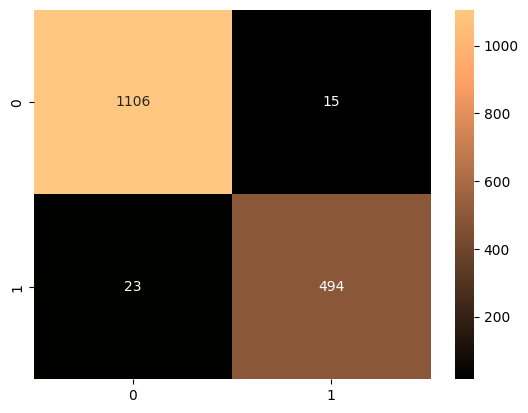

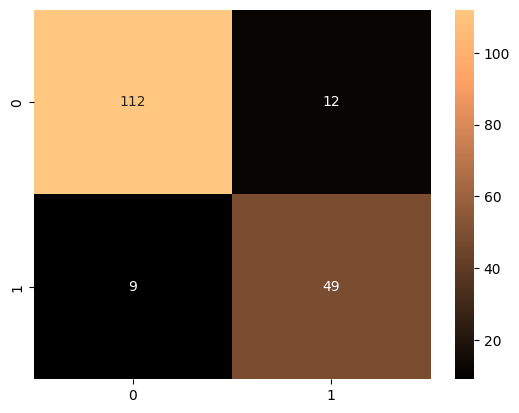

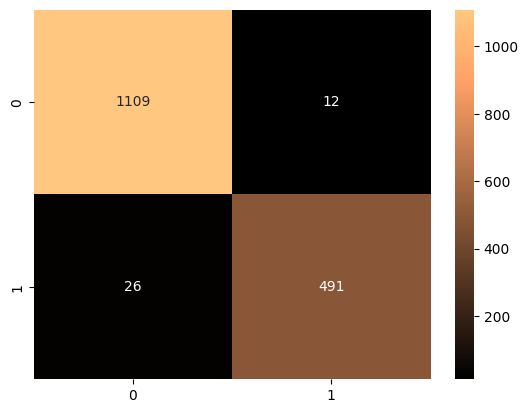

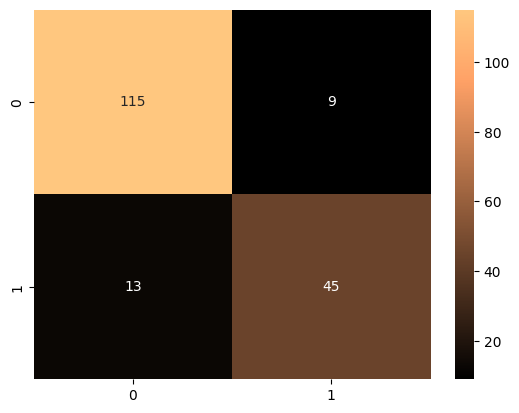

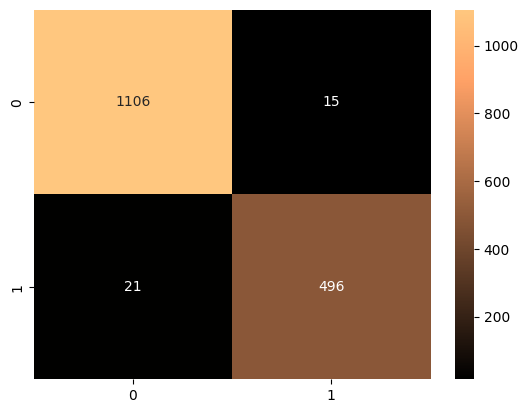

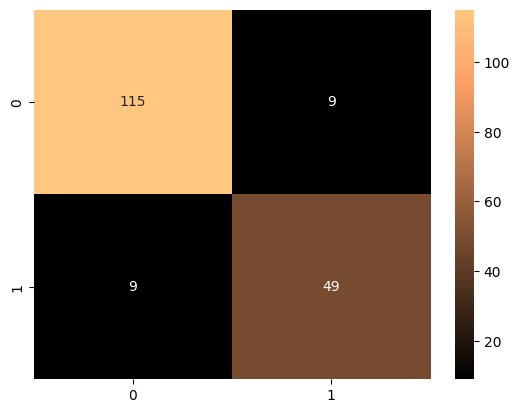

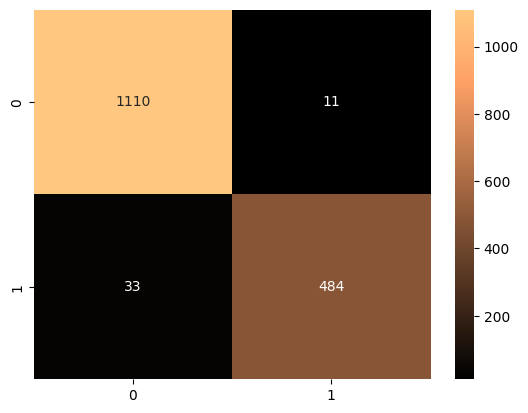

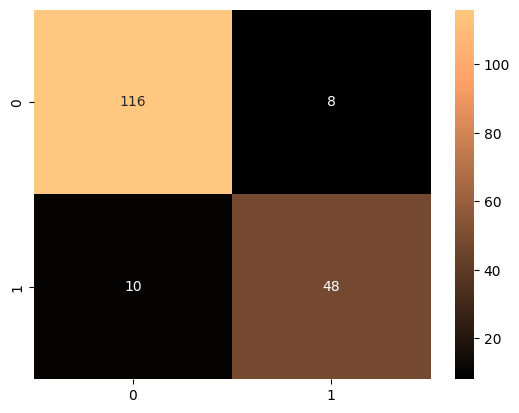

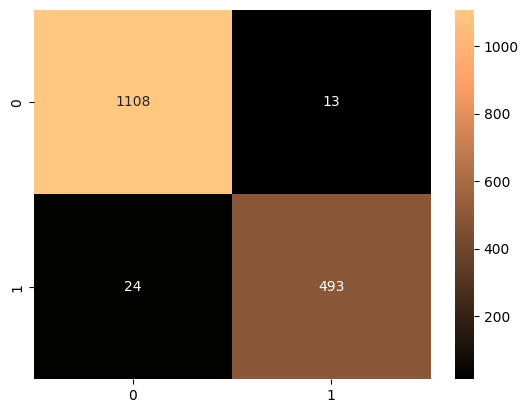

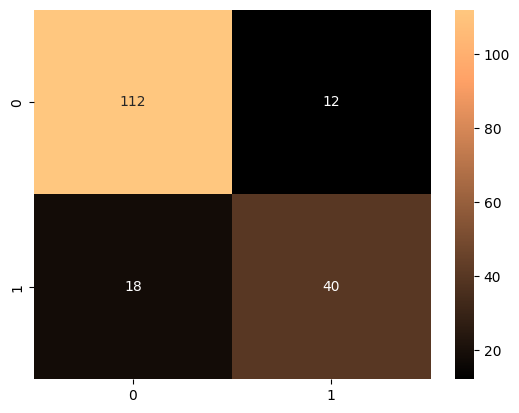

train accuracy 0.9772283272283271
test accuracy 0.8736263736263737
train precision 0.9761076180617654
test precision 0.8547128188568497
train recall 0.9710829229905983
test recall 0.8533766407119021
train f1 0.9735152080912128
test f1 0.8535228494417609
train               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1121
           1       0.97      0.95      0.96       517

    accuracy                           0.98      1638
   macro avg       0.98      0.97      0.97      1638
weighted avg       0.98      0.98      0.98      1638

test               precision    recall  f1-score   support

           0       0.86      0.90      0.88       124
           1       0.77      0.69      0.73        58

    accuracy                           0.84       182
   macro avg       0.82      0.80      0.80       182
weighted avg       0.83      0.84      0.83       182

Matthews correlation coefficient 0.9471709083729678
Matthews correlation coeffici

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()

score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, learning_rate=0.9, alpha=1,  )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_Train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgbtrain.append(mmc_Train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtest.append(mmc_test)
    sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
    plt.show()
    sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
    plt.show()   
    
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgbtrain))
print('Matthews correlation coefficient',mean(mmc_xgbtest))


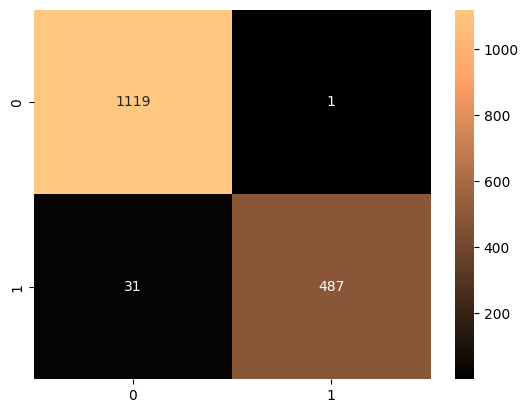

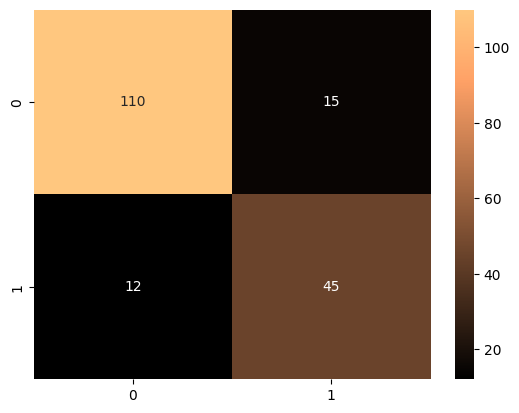

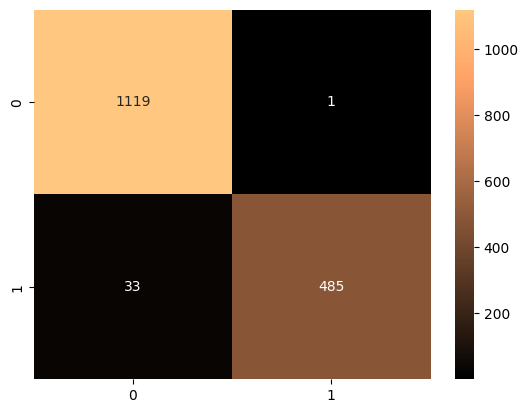

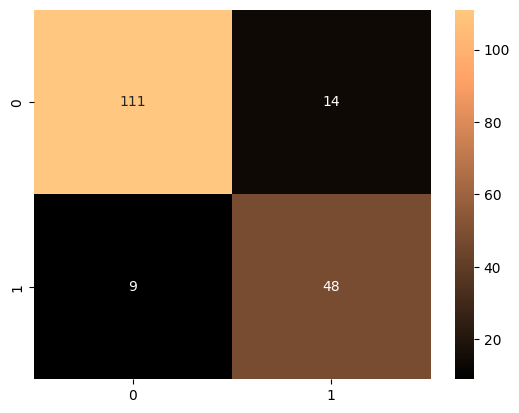

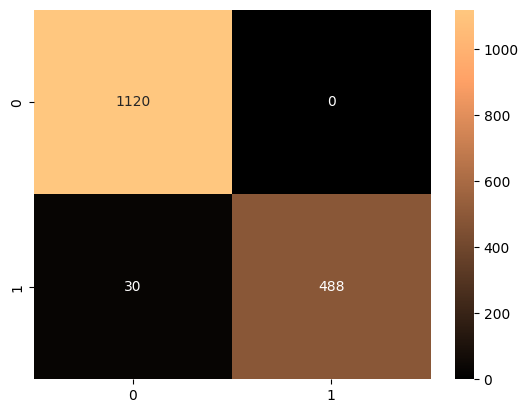

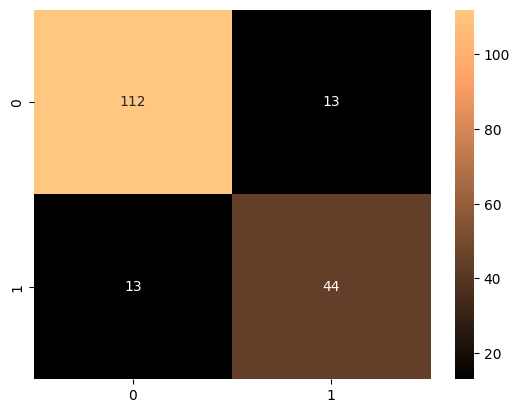

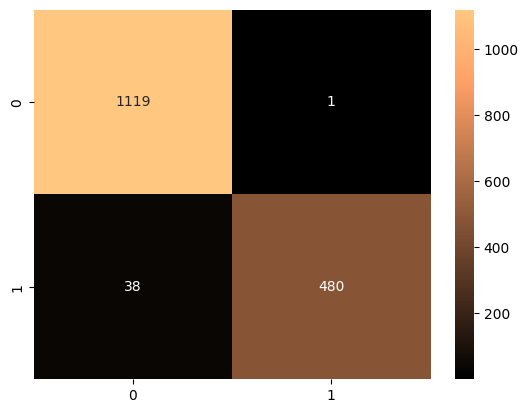

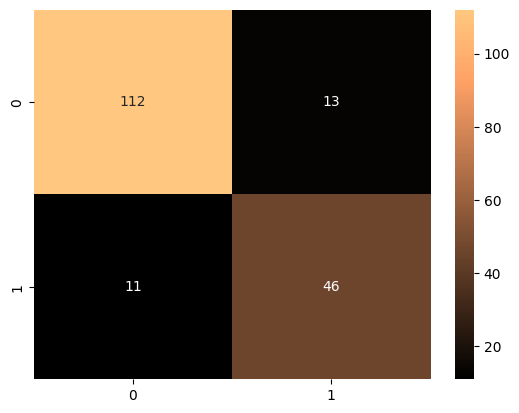

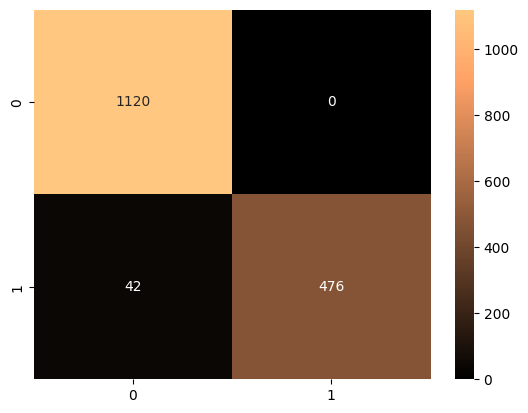

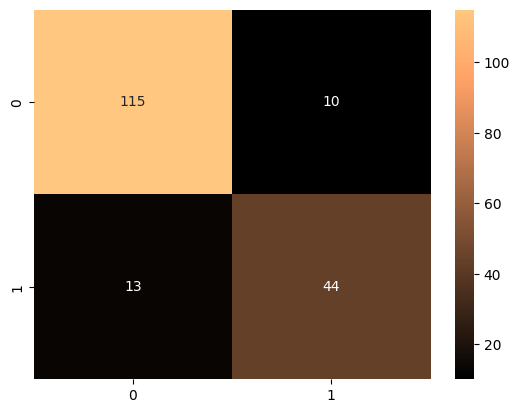

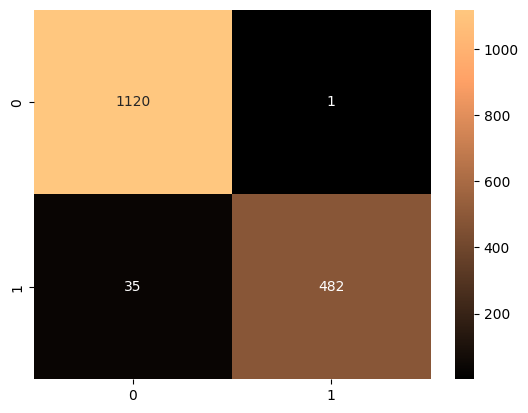

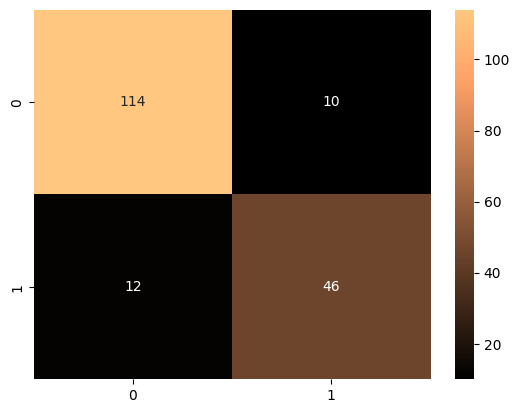

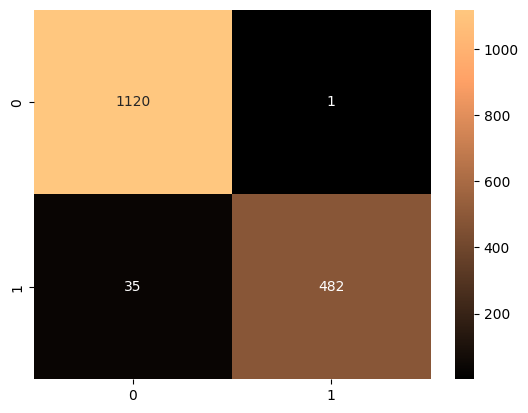

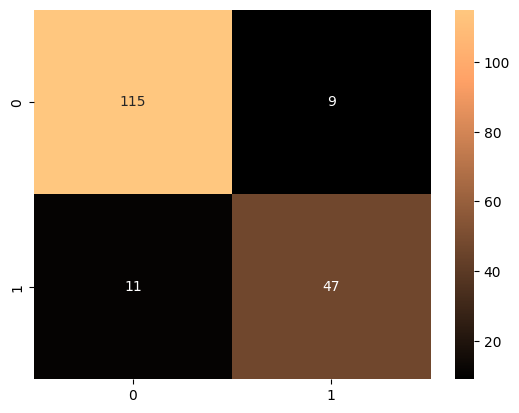

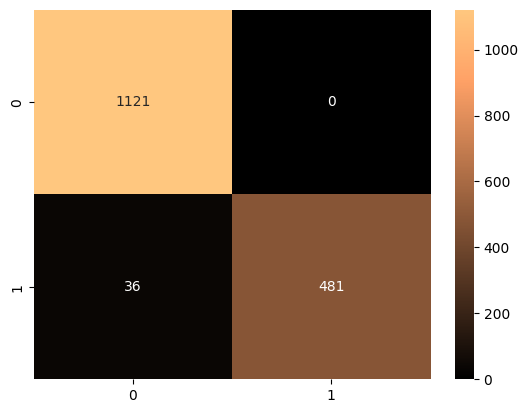

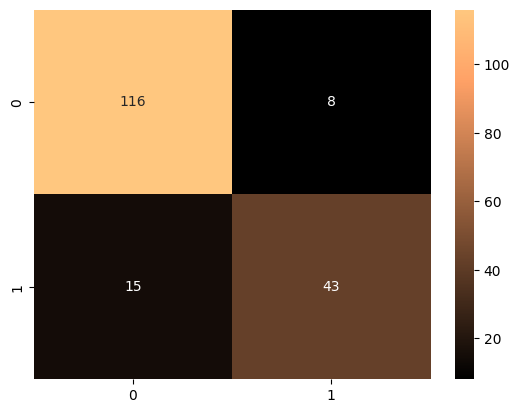

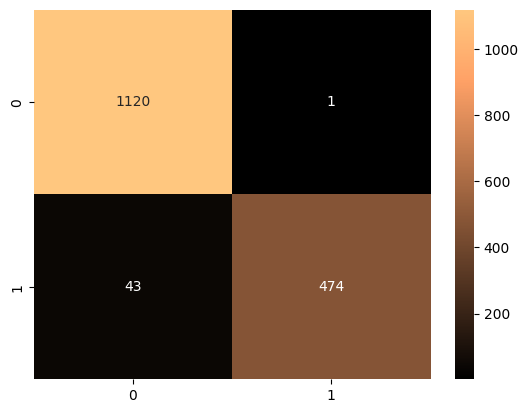

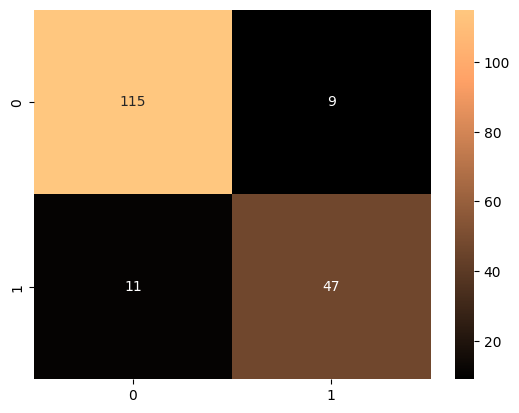

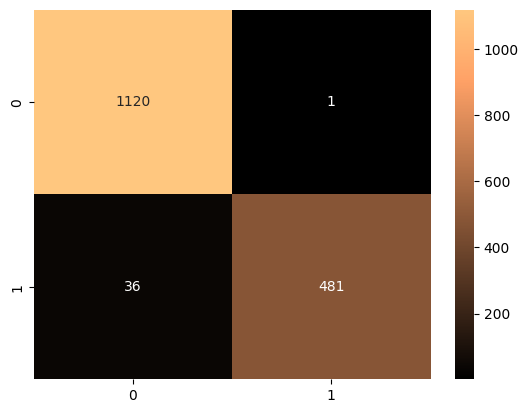

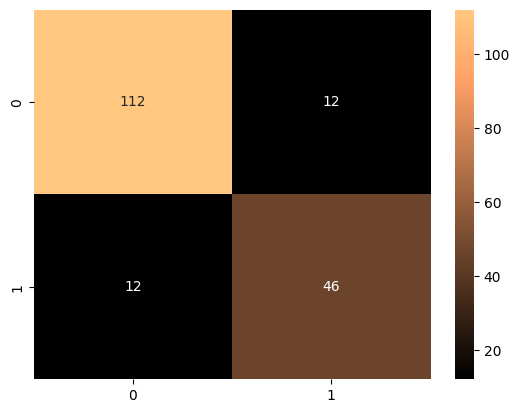

train accuracy 0.9776556776556775
test accuracy 0.8725274725274726
train precision 0.9837489894250036
test precision 0.8538683288830047
train recall 0.96500060971588
test recall 0.8511817614113146
train f1 0.9736493352739121
test f1 0.8521085650214626
train               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1121
           1       1.00      0.93      0.96       517

    accuracy                           0.98      1638
   macro avg       0.98      0.96      0.97      1638
weighted avg       0.98      0.98      0.98      1638

test               precision    recall  f1-score   support

           0       0.90      0.90      0.90       124
           1       0.79      0.79      0.79        58

    accuracy                           0.87       182
   macro avg       0.85      0.85      0.85       182
weighted avg       0.87      0.87      0.87       182

Matthews correlation coefficient 0.948561468315703
Matthews correlation coefficient

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_ettrain=list()
mmc_ettest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, n_estimators=500, )
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc_Train= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_ettrain.append(mmc_Train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_ettest)
    mmc_ettest.append(mmc_test)
    sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
    plt.show()
    sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
    plt.show()   
    
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient',mean(mmc_ettrain))
print('Matthews correlation coefficient',mean(mmc_ettest))

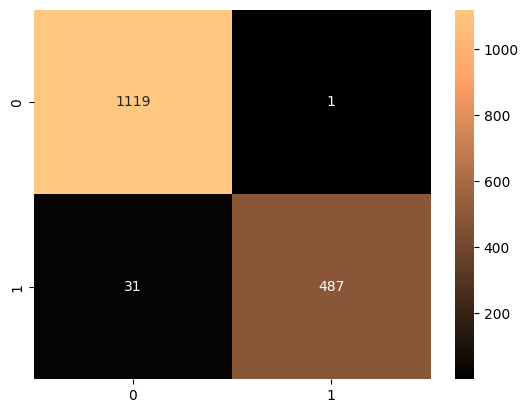

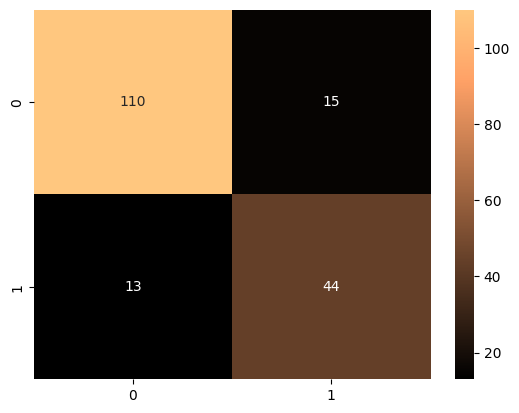

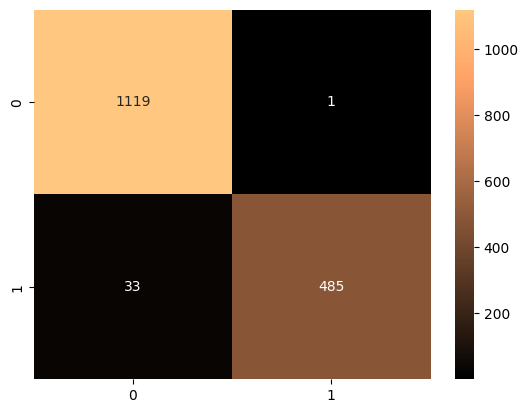

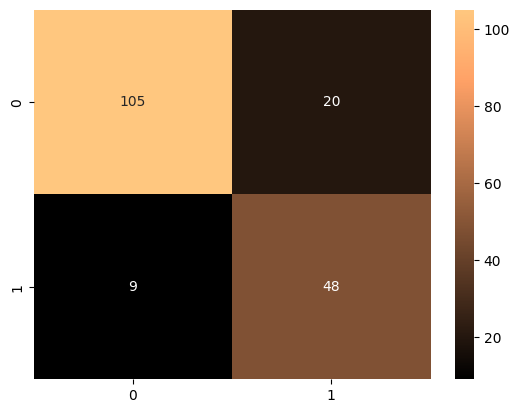

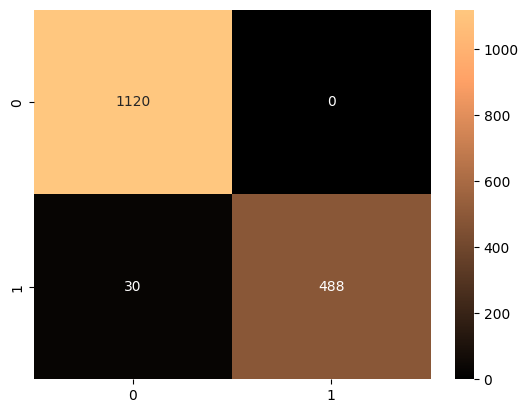

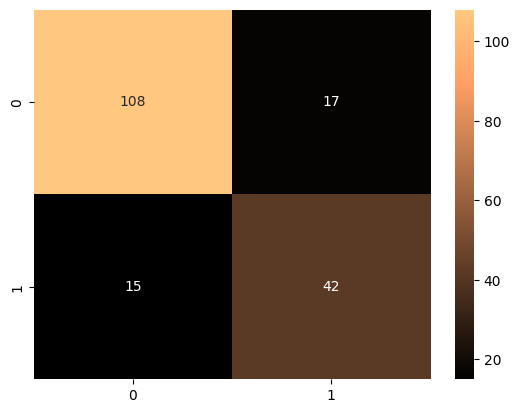

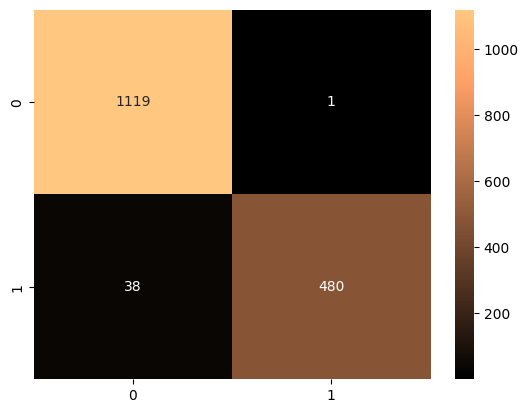

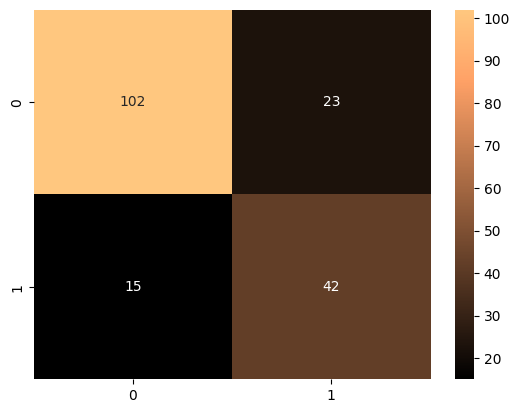

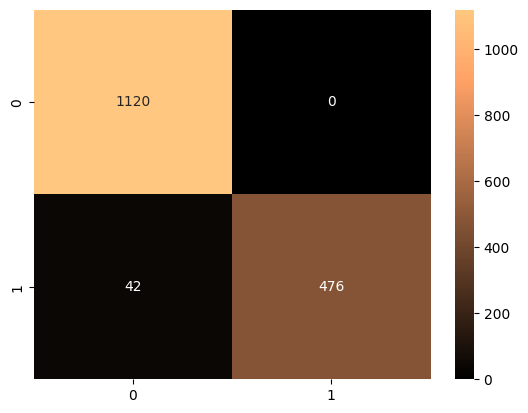

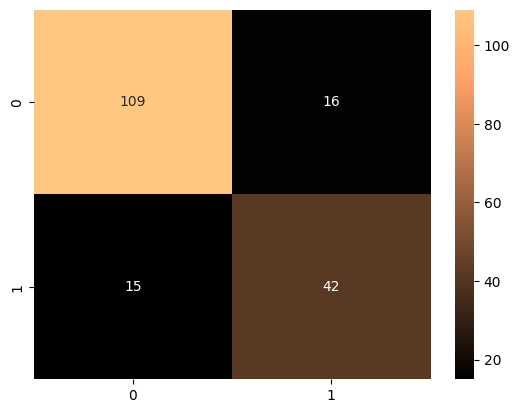

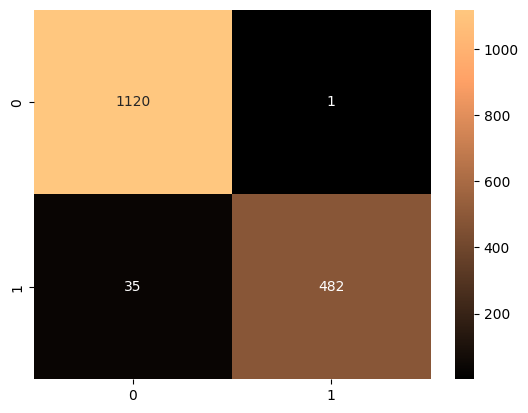

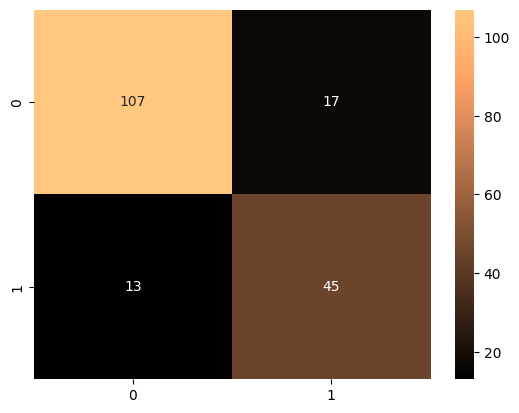

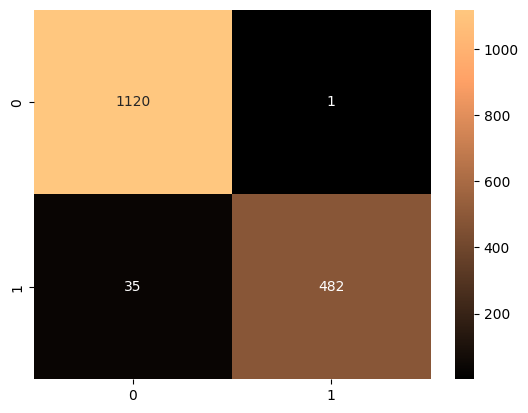

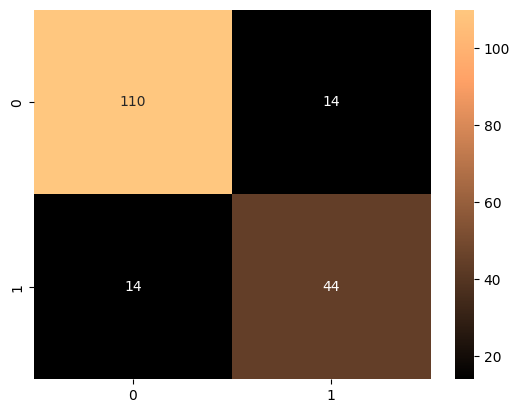

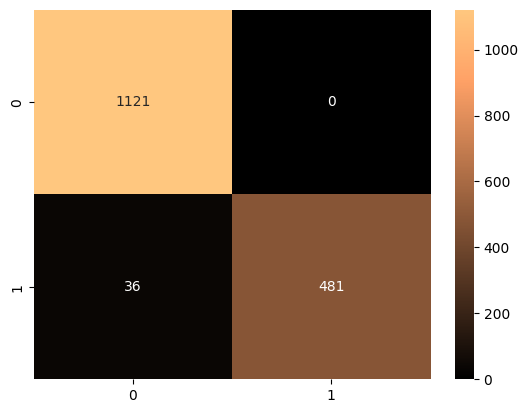

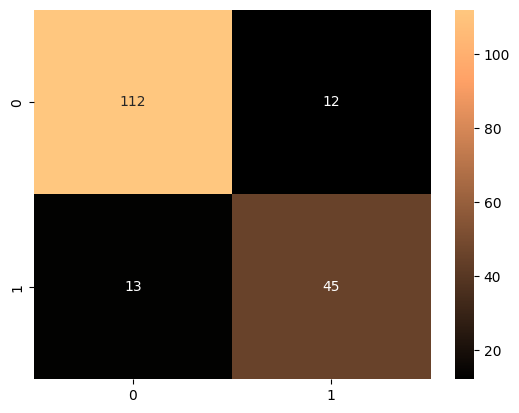

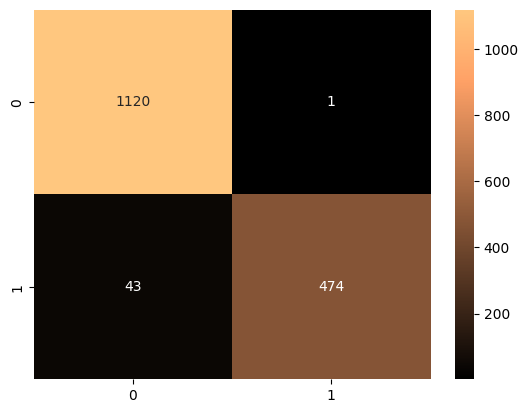

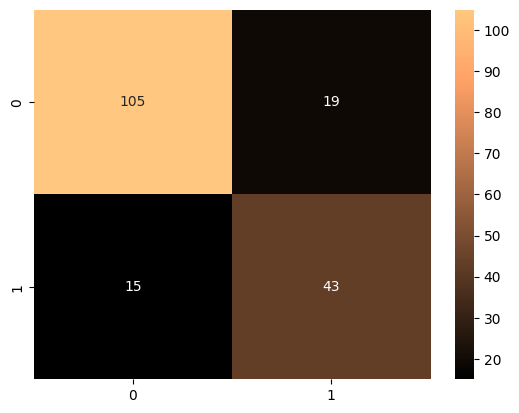

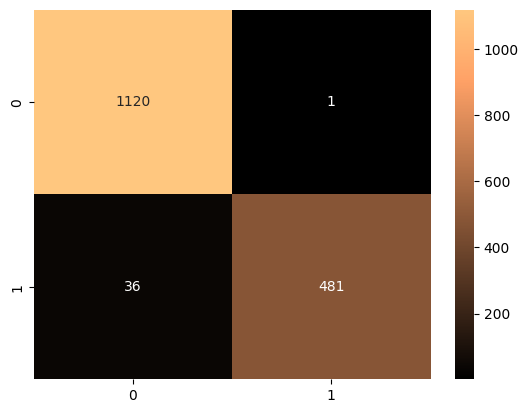

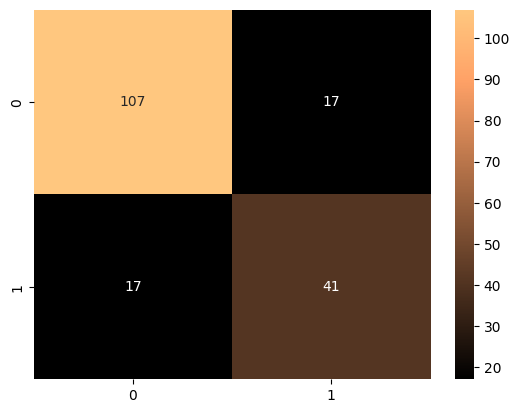

train accuracy 0.9776556776556775
test accuracy 0.8302197802197803
train precision 0.9837489894250036
test precision 0.8032525582377662
train recall 0.96500060971588
test recall 0.8109042659485197
train f1 0.9736493352739121
test f1 0.8063508363703182
train               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1121
           1       1.00      0.93      0.96       517

    accuracy                           0.98      1638
   macro avg       0.98      0.96      0.97      1638
weighted avg       0.98      0.98      0.98      1638

test               precision    recall  f1-score   support

           0       0.86      0.86      0.86       124
           1       0.71      0.71      0.71        58

    accuracy                           0.81       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.81      0.81      0.81       182

Matthews correlation coefficient 0.948561468315703
Matthews correlation coefficient

In [8]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dttrain=list()
mmc_dttest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1, )
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc_Train= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_Train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
    plt.show()
    sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
    plt.show()   
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dttrain))
print('Matthews correlation coefficient',mean(mmc_dttest))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.916


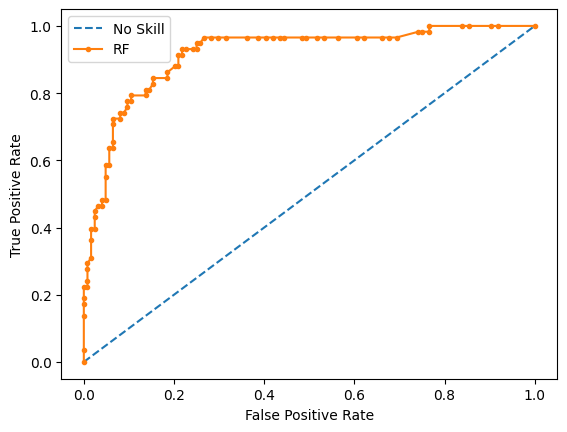

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probsRF =RF.predict_proba(X_Test)
lr_probsRF = lr_probsRF[:, 1]
ns_probsRF = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probsRF)
lr_auc = roc_auc_score(Y_Test, lr_probsRF)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probsRF)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probsRF)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.906


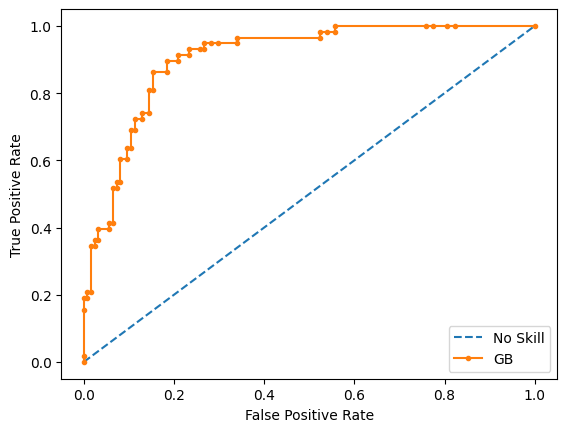

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probsGB =GB.predict_proba(X_Test)
lr_probsGB = lr_probsGB[:, 1]
ns_probsGB = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probsGB)
lr_auc = roc_auc_score(Y_Test, lr_probsGB)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probsGB)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probsGB)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='GB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.931


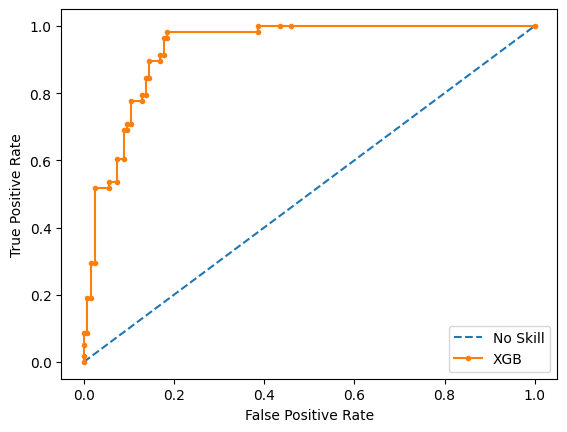

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probsXGB =XGB.predict_proba(X_Test)
lr_probsXGB = lr_probsXGB[:, 1]
ns_probsXGB = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probsXGB)
lr_auc = roc_auc_score(Y_Test, lr_probsXGB)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probsXGB)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probsXGB)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.860


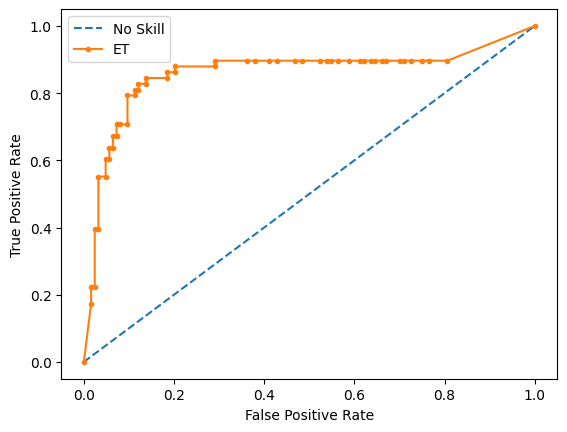

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probsET =ET.predict_proba(X_Test)
lr_probsET = lr_probsET[:, 1]
ns_probsET = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probsET)
lr_auc = roc_auc_score(Y_Test, lr_probsET)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probsET)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probsET)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ET')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.784


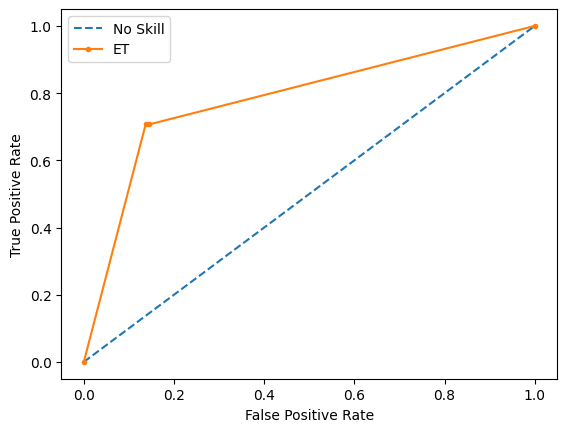

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probsDT =DT.predict_proba(X_Test)
lr_probsDT = lr_probsDT[:, 1]
ns_probsDT = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probsDT)
lr_auc = roc_auc_score(Y_Test, lr_probsDT)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probsDT)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probsDT)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ET')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

RF: f1=0.768 auc=0.846


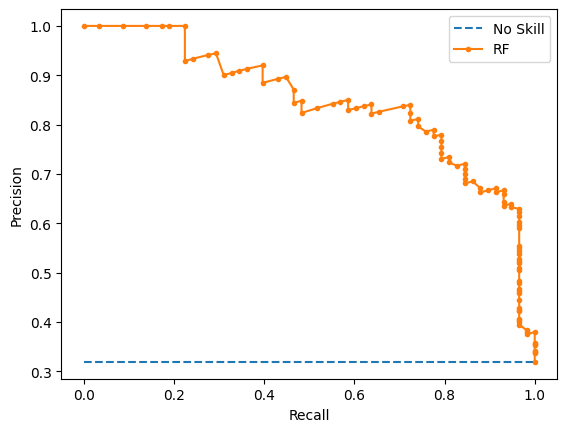

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precisionRF, lr_recallRF, _ = precision_recall_curve(Y_Test, lr_probsRF)
yhatRF=RF.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhatRF), auc(lr_recallRF, lr_precisionRF)
# summarize scores
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recallRF, lr_precisionRF, marker='.', label='RF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

GB: f1=0.709 auc=0.803


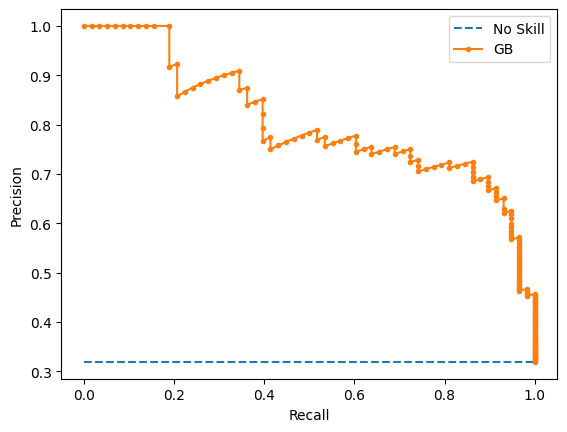

In [15]:
lr_precisionGB, lr_recallGB, _ = precision_recall_curve(Y_Test, lr_probsGB)
yhatGB=GB.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhatGB), auc(lr_recallGB, lr_precisionGB)
# summarize scores
print('GB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recallGB, lr_precisionGB, marker='.', label='GB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

XGB: f1=0.727 auc=0.827


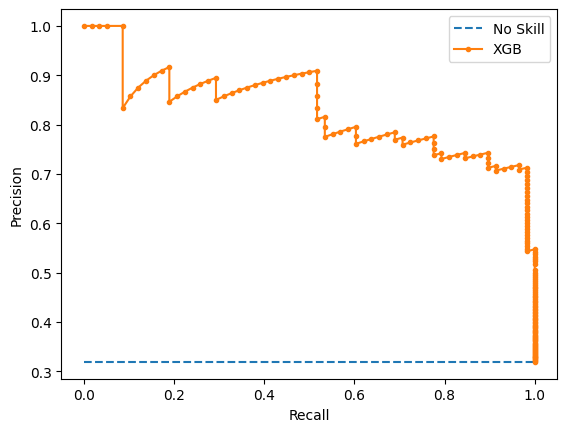

In [16]:
lr_precisionXGB, lr_recallXGB, _ = precision_recall_curve(Y_Test, lr_probsXGB)
yhatXGB=XGB.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhatXGB), auc(lr_recallXGB, lr_precisionXGB)
# summarize scores
print('XGB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recallXGB, lr_precisionXGB, marker='.', label='XGB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

ET: f1=0.793 auc=0.788


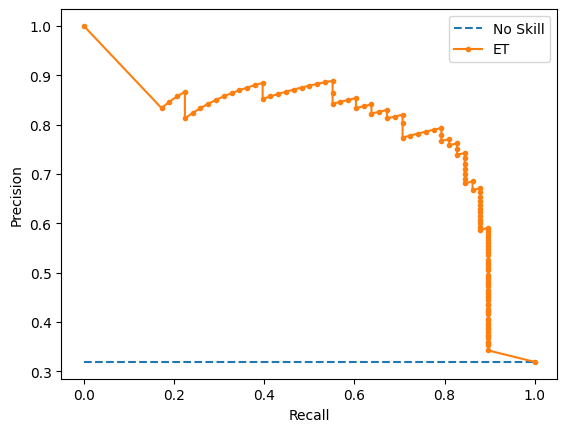

In [17]:
lr_precisionET, lr_recallET, _ = precision_recall_curve(Y_Test, lr_probsET)
yhatET=ET.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhatET), auc(lr_recallET, lr_precisionET)
# summarize scores
print('ET: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recallET, lr_precisionET, marker='.', label='ET')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

DT: f1=0.707 auc=0.752


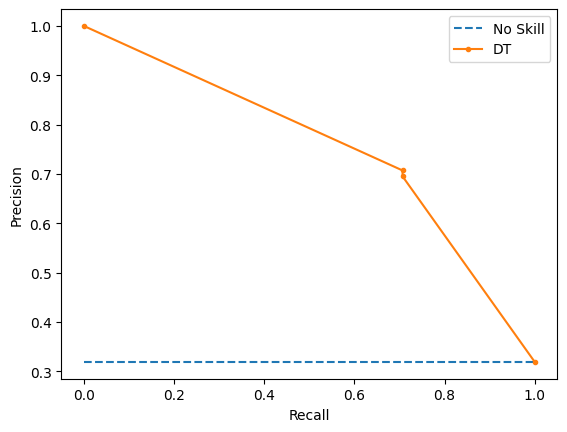

In [18]:
lr_precisionDT, lr_recallDT, _ = precision_recall_curve(Y_Test, lr_probsDT)
yhatDT=DT.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhatDT), auc(lr_recallDT, lr_precisionDT)
# summarize scores
print('DT: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recallDT, lr_precisionDT, marker='.', label='DT')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()